In [36]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
words=open('indian_names.txt','r').read().splitlines()
len(words)

6487

In [38]:
chs=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chs)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)
    

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [39]:
block_size=3 # context length i.e from how many chars we predict the next one
x,y=[],[] 
for w in words:
    # print(w)
    context=[0]*block_size #initially it has context 3
    for ch in w+'.':
        ix=stoi[ch]
        x.append(context)
        y.append(ix)
        print(''.join((itos[i]) for i in context),'----->',itos[ix]) #converts the context into the list
        context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
x=torch.tensor(x)
y=torch.tensor(y)


... -----> a
..a -----> a
.aa -----> b
aab -----> o
abo -----> d
bod -----> .
... -----> a
..a -----> a
.aa -----> b
aab -----> i
abi -----> d
bid -----> .
... -----> a
..a -----> a
.aa -----> b
aab -----> i
abi -----> d
bid -----> a
ida -----> .
... -----> a
..a -----> a
.aa -----> c
aac -----> h
ach -----> a
cha -----> l
hal -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> e
ade -----> s
des -----> h
esh -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> l
dil -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> s
dis -----> h
ish -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> t
dit -----> y
ity -----> a
tya -----> .
... -----> a
..a -----> a
.aa -----> e
aae -----> n
aen -----> a
ena -----> b
nab -----> .
... -----> a
..a -----> a
.aa -----> f
aaf -----> r
afr -----> e
fre -----> e
ree -----> n
een -----> .
... -----> a
..a -----> a
.aa -----> f
aaf -----> r
afr -----> i
fri -----> n
rin -----> .
... -----> a

In [40]:
x.shape ,x.dtype ,y.shape,y.dtype

(torch.Size([47706, 3]), torch.int64, torch.Size([47706]), torch.int64)

In [41]:
C=torch.randn(27,2).float() #look up table to embed the vector
C

tensor([[-0.2080,  0.1570],
        [ 1.0416,  0.2856],
        [-0.8469, -0.5100],
        [ 0.3596, -1.3194],
        [ 1.0621, -0.0884],
        [-2.7206, -0.2215],
        [ 1.2617,  1.0108],
        [-0.0733, -0.6023],
        [-0.1282,  0.7707],
        [-0.8604, -0.1213],
        [ 0.6372,  1.3709],
        [-0.0703,  0.0393],
        [-0.0724,  0.6827],
        [-0.0338,  3.4570],
        [ 0.7279,  0.5328],
        [ 0.6587, -0.1609],
        [-0.8715,  0.2127],
        [ 0.2372, -0.6110],
        [-0.1582, -0.3600],
        [-1.5864, -1.3686],
        [-0.3552, -0.0070],
        [-1.1556,  0.4129],
        [ 1.8119,  0.5000],
        [ 0.8045,  0.4151],
        [-0.4323, -0.7927],
        [-0.3357, -0.4175],
        [-0.1137,  1.3699]])

In [42]:
C[5]

tensor([-2.7206, -0.2215])

In [43]:
C[[5,6,7]] # call with a list of value

tensor([[-2.7206, -0.2215],
        [ 1.2617,  1.0108],
        [-0.0733, -0.6023]])

In [44]:
C[x] .shape#X as a value passes to C

torch.Size([47706, 3, 2])

In [45]:
# emb=C[x]plt.plot(lri,lossi)

In [46]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape # its only for fixed block size 3


In [47]:
W1=torch.randn(6,100)
b1=torch.randn(100)

In [48]:
# emb=torch.cat(torch.unbind(emb,1),1).shape # for all block size

In [49]:
emb=C[x]

In [50]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1) # -1 for any value in x like 32
h

tensor([[ 0.3530, -0.3051,  0.1556,  ...,  0.3041,  0.3500, -0.7843],
        [ 0.9281, -0.9797,  0.2171,  ..., -0.2578, -0.4923, -0.5957],
        [ 0.6002, -0.1627,  0.8331,  ..., -0.2872, -0.0307, -0.9976],
        ...,
        [ 0.9932, -1.0000, -0.4860,  ...,  0.6494, -0.9163,  0.6387],
        [-0.9979,  0.9999,  0.9819,  ...,  0.9948,  0.9988, -1.0000],
        [-0.4437, -0.1465, -0.7429,  ..., -0.9626, -0.9401,  1.0000]])

In [51]:
W2=torch.randn(100,27)
b2=torch.randn(27)
logits=h @ W2 + b2 #softmax function
counts=logits.log() #finding fake counts to normalize the values
prob=counts/counts.sum(1,keepdim=True)
#instead of using the 3 lines ,we use cross entropy to find the loss
prob.shape

torch.Size([47706, 27])

In [52]:
y

tensor([1, 1, 2,  ..., 5, 2, 0])

In [53]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator =g ,requires_grad=True) # using 10 for 10 neurons 
W1=torch.randn((30,200),generator=g) # there are three unputs for each neuron 
b1=torch.randn((200),generator=g) #using broadcasting to take copy of valiues
W2=torch.randn((200,27),generator=g) #gives a character from 27 characters so we are using 27
b2=torch.randn((27),generator=g)
parameters=[C,W1,b1,W2,b2]

In [54]:
sum(p.nelement() for p in parameters)

11897

In [55]:
for p in parameters:
    p.requires_grad=True

In [56]:
# for _ in range(100):
#     #forward pass
#     emb=C[x]
#    print(''.join((itos[i]) for i in context),'----->',itos[ix])   h=torch.tanh(emb.view(-1,6) @ W1 + b1)
#     logits=h @ W2 + b2
#     loss=F.cross_entropy(logits,y)
#     print(loss.item())
#     #backward pass
#     for p in parameters:
#          p.grad=None
#     loss.backward()
#     #update
#     for p in parameters:
#          p.data+=-0.1*p.grad
# print(loss.item())


In [57]:
torch.randint(0,5,(32,))


tensor([1, 2, 0, 4, 2, 1, 3, 2, 4, 2, 1, 3, 4, 2, 3, 4, 3, 1, 2, 1, 2, 4, 0, 1,
        4, 3, 4, 4, 3, 0, 1, 1])

In [58]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

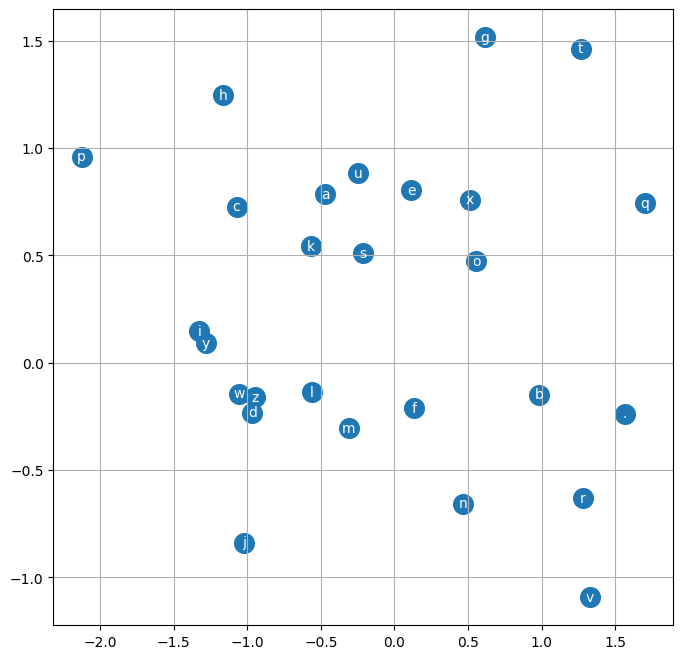

In [59]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [60]:
# plt.plot(lri,lossi)

In [61]:
# to avoid overfiting
# #80% - training split
#10% - dev/validation split
#10% - test split

In [62]:
#creating a dataset
def build_dataset(words): #TO split in three parts
    block_size=3 # context length i.e from how many chars we predict the next one
    x,y=[],[] 
    for w in words:
      #  print(w)
       context=[0]*block_size #initially it has context 3
       for ch in w+'.':
          ix=stoi[ch]
          x.append(context)
          y.append(ix)
        #   print(''.join((itos[i]) for i in context),'----->',itos[ix])   #converts the context into the list
          context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
    x=torch.tensor(x)
    y=torch.tensor(y)
    print(x.shape,y.shape)
    return x,y
import random
random.seed(42)
random.shuffle(words) # shuffle all the words in a particular ordergit config --global
n1=int(0.8*len(words)) #0.8 * 32000=28000 (app)
n2=int(0.9*len(words)) #0.9 * 32000=25000
xtr,ytr=build_dataset(words[:n1])
xdev,ydev=build_dataset(words[n1:n2]) #n1-n2
xte,yte=build_dataset(words[n2:])


torch.Size([38242, 3]) torch.Size([38242])
torch.Size([4733, 3]) torch.Size([4733])
torch.Size([4731, 3]) torch.Size([4731])


In [63]:
# using xtr and ytr
lri=[]
lossi=[]
stepi=[]
for i in range(5000):
    ix=torch.randint(0,xtr.shape[0],(32,)) #mini batch constructed
    emb=C[xtr[ix]] #32,3,10 
    h=torch.tanh(emb.view(-1,30) @ W1 + b1) 
    logits=h @ W2 + b2
    loss=F.cross_entropy(logits,ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
         p.grad=None
    loss.backward()
    #update
    lr=0.01
    for p in parameters:
         p.data+=-lr*p.grad
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
print(loss.item())

4.32979679107666


In [64]:
ix=torch.randint(0,xdev.shape[0],(32,)) #mini batch constructed
emb=C[xdev[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,ydev[ix])
loss

tensor(4.7297, grad_fn=<NllLossBackward0>)

In [65]:
ix=torch.randint(0,xte.shape[0],(32,)) #mini batch constructed
emb=C[xte[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,yte[ix])
loss

tensor(4.1186, grad_fn=<NllLossBackward0>)

In [66]:
xte.shape,yte.shape

(torch.Size([4731, 3]), torch.Size([4731]))

In [67]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(50):
    
    out = []
    context = [0] * block_size #initialize blocksize
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

brngil.
san.
shavend.
ramlumanurh.
bad.
nam.
adhradhe.
ibheaj.
padhaki.
sushanar.
kal.
kal.
kal.
nashiker.
shi.
jam.
kinder.
kukcafma.
chhukeearea.
sariur.
mashi.
ajreyhina.
shalbanllidbewajeltfsjatel.
subhak.
saouhmstrdh.
fukhu.
shagidaiar.
faui.
wavsenn.
suid.
sir.
faroevytka.
kindar.
sht.
negu.
sanaszar.
kavenryksourin.
ruansenn.
sxanri.
dam.
chena.
kal.
motada.
i.
babief.
arit.
ajohvleali.
alchanti.
iia.
sibgaeir.
